#  1 Business Understanding

## Objective
The goal of this project is to analyze Formula 1 (F1) data to gain insights into race performance, constructor strategies, and driver effectiveness. The analysis aims to provide valuable insights to stakeholders, such as team managers, sponsors, and sports analysts, to help them make informed decisions about future races, sponsorship opportunities, and driver selections.

## Key Stakeholders
- **Team Managers**: Interested in understanding the performance trends of their drivers and constructors to strategize for upcoming races.
- **Sponsors**: Looking for data-driven insights to identify the most promising teams and drivers for sponsorship.
- **Sports Analysts**: Seeking in-depth analysis of race outcomes, driver performance, and constructor strategies to provide expert commentary and predictions.
- **F1 Enthusiasts**: Fans who are keen on understanding the historical performance of their favorite drivers and teams.

# 2 Data Understanding

## Overview
The dataset contains four key components:

### Results Dataset
- **Description**: Contains detailed information about race results, including positions, points, and other race-specific details.
- **Key Columns**: `race_id`, `driver_id`, `constructor_id`, `position`, `points`, `laps`, `time`, `status`.

### Constructors Dataset
- **Description**: Provides details about the constructors (teams) involved in F1 races.
- **Key Columns**: `constructor_id`, `constructor_name`, `nationality`.

### Race Dataset
- **Description**: Includes information about the races themselves, such as location, date, and circuit details.
- **Key Columns**: `race_id`, `year`, `round`, `circuit_id`, `date`, `time`, `name`.

### Drivers Dataset
- **Description**: Contains information about the drivers, including their personal details and career stats.
- **Key Columns**: `driver_id`, `driver_name`, `dob`, `nationality`, `wins`, `poles`.


# 3 Data preparation

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 3.1  Reading the Data

In [2]:
# reading  the constructors datasets
constructors = pd.read_csv("constructors.csv")
constructors.head()


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [3]:
# reading the result dataset
results = pd.read_csv("results.csv")
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# reading the race dataset
race = pd.read_csv("races.csv")
race.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
# reading the drivers dataset
drivers = pd.read_csv("drivers.csv")
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


# 3.2 **Data Exploration**

We will focus on all the dataset provided  for this project first we will have to merge all the dataset together

In [6]:
# merging the data sets
df = pd.merge(results,race[["raceId", "year", "name", "round"]],on="raceId",how="left")
df = pd.merge(df,drivers[["driverId","driverRef","nationality"]], on= "driverId",how="left")
df = pd.merge(df,constructors[["constructorId","name","nationality"]],on= "constructorId",how="left")

df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [7]:
# summary stats
df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round
count,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000
mean,13260.940986,546.376560,274.357291,49.801161,11.145820,12.814812,1.959578,46.228251,17.317056,1991.099287,8.420793
std,7656.813206,309.642244,279.275606,61.091426,7.213453,7.677869,4.306475,29.577860,26.081700,19.799290,4.992080
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000
25%,6630.500000,298.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000,1977.000000,4.000000
50%,13260.000000,527.000000,170.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000,8.000000
75%,19889.500000,803.000000,385.000000,60.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2008.000000,12.000000
max,26524.000000,1132.000000,860.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2024.000000,22.000000


## **Data cleaning**

From our data we notice that there are some columns that are irrelevant to our analysis our first step will be to drop them

In [8]:
# dropping unnecessary columns from our dataset
df.drop(["resultId","raceId","driverId","constructorId","number","position","positionText","statusId"],axis=1,inplace=True)

The next step will be renaming the columns for clarity,redability and consistency

In [9]:
# Renaming the columns for clarity and consistency
df.rename(columns={
    "rank" : "fastestLapRank",
    "name_x": "gp_name",
    "driverRef": "driver",
    "name_y": "constructors_name",
    "nationality_x": "drivers_nationality",
    "nationality_y": "constructors_nationality"
}, inplace=True)


In [10]:
# sorting the dataset by year round and positionOrder
df = df.sort_values(by=['year',"round","positionOrder"],ascending=[False,True,True])
df.head()

,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,drivers_nationality,constructors_name,constructors_nationality
26280,1,1,26.0,57,1:31:44.742,5504742,39,1,1:32.608,210.383,2024,Bahrain Grand Prix,1,max_verstappen,Dutch,Red Bull,Austrian
26281,5,2,18.0,57,+22.457,5527199,40,4,1:34.364,206.468,2024,Bahrain Grand Prix,1,perez,Mexican,Red Bull,Austrian
26282,4,3,15.0,57,+25.110,5529852,44,6,1:34.507,206.156,2024,Bahrain Grand Prix,1,sainz,Spanish,Ferrari,Italian
26283,2,4,12.0,57,+39.669,5544411,36,2,1:34.090,207.069,2024,Bahrain Grand Prix,1,leclerc,Monegasque,Ferrari,Italian
26284,3,5,10.0,57,+46.788,5551530,40,12,1:35.065,204.946,2024,Bahrain Grand Prix,1,russell,British,Mercedes,German


In [11]:

# Replace '\\N' with np.nan in the respective columns
df['time'] = df['time'].replace("\\N", np.nan)
df['milliseconds'] = df['milliseconds'].replace("\\N", np.nan)
df['fastestLapRank'] = df['fastestLapRank'].replace("\\N", np.nan)
df['fastestLapTime'] = df['fastestLapTime'].replace("\\N", np.nan)
df['fastestLapSpeed'] = df['fastestLapSpeed'].replace("\\N", np.nan)
df['fastestLap'] = df['fastestLap'].replace("\\N", np.nan)


In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

grid                        0
positionOrder               0
points                      0
laps                        0
time                        0
milliseconds                0
fastestLap                  0
fastestLapRank              0
fastestLapTime              0
fastestLapSpeed             0
year                        0
gp_name                     0
round                       0
driver                      0
drivers_nationality         0
constructors_name           0
constructors_nationality    0
dtype: int64

Our dataset mostly contains objects in the next step we are going to convert some of the columns to float

In [14]:
# changing our dataset to float for further processing
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [15]:
# Resetting the index to ensure clean, sequential indexing
df.reset_index(drop=True, inplace=True)


## 5 Exploratory Data Analysis
### 5.1  Univariate Analysis
This involves the examination of a single variable. The primary objective is to describe the data and find patterns within it. It helps us understand the central tendency, the distribution and spread of our data.

To do so, we will use summary statistics and distribution plots such as histograms, Box plots and bar plots.

What movies have been the most successfull financially?
To answer this question, we look at the box office gross earnings and profits of various movies.



##  what does the distribtion of the fastest lap speed look like

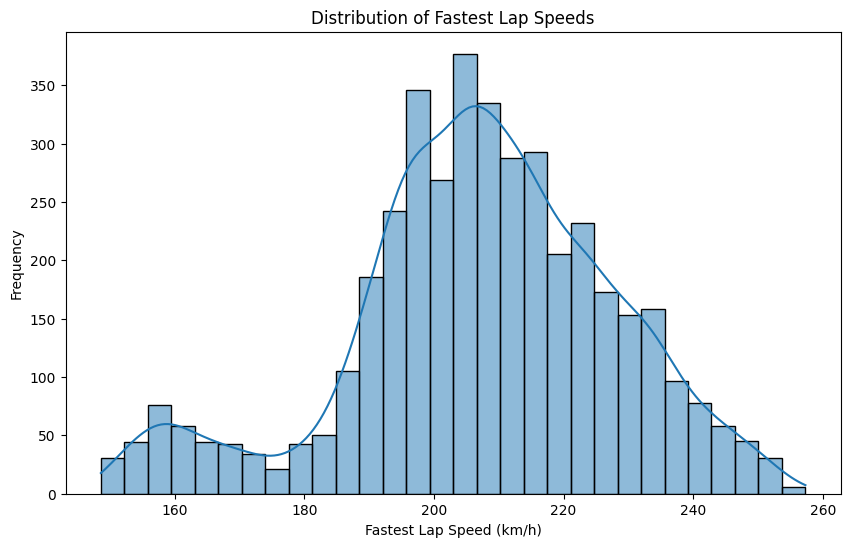

In [16]:
# Distribution of Fastest Lap Speeds
plt.figure(figsize=(10, 6))
sns.histplot(df['fastestLapSpeed'], kde=True, bins=30)
plt.title('Distribution of Fastest Lap Speeds')
plt.xlabel('Fastest Lap Speed (km/h)')
plt.ylabel('Frequency')
plt.show()




### Summary of Lap Speed Distribution

The histogram above displays the distribution of fastest lap speeds, with the x-axis representing speed in km/h and the y-axis showing the frequency of occurrences. The distribution peaks around 200 km/h, indicating that this is the most common fastest lap speed in the dataset. The data is slightly left-skewed, with a broader spread ranging from about 75 km/h to 250 km/h. The overlaid kernel density estimate (KDE) curve helps to smooth out the histogram, providing a clearer view of the underlying distribution. Most lap speeds fall between 175 km/h and 225 km/h, with a notable concentration around 200 km/h.


In [17]:
# Gp winners drives
driver_winner = (df.loc[df["positionOrder"] == 1]
                 .groupby("driver")
                 .size()  
                 .reset_index(name='wins')  
                 .sort_values(by='wins', ascending=False))  



## Who are the top 10 gp winners of all times?

Text(0.5, 1.0, 'top_ten_drivers with the most wins')

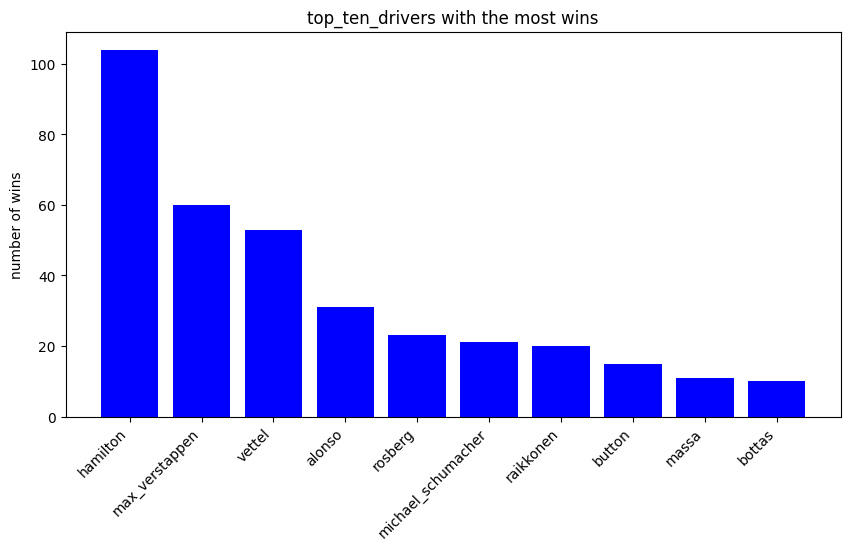

In [18]:
# visualizing drivers with the most wins 
top_ten_drivers = driver_winner.head(10)
plt.figure(figsize=(10,5))
plt.bar(top_ten_drivers["driver"],top_ten_drivers["wins"],color = "blue")
plt.xticks(rotation=45,ha="right")
plt.ylabel("number of wins")
plt.title("top_ten_drivers with the most wins")

From the above visualization:
- Hamilton has the most wins, with a bar reaching slightly  104 wins.
- Michael Schumacher is the second, with around 91 wins.
- Max Verstappen is third, with around 61 wins.
- Vettel and Prost follow, each with around 50-60 wins.
- Senna and Alonso are next, with around 40-50 wins.
- Mansell, Stewart, and Lauda are at the bottom of the top ten, each with around 30-40 wins.


## who are the top 10 constructors with the most wins ?

In [19]:
# GP constructors winners 
constructors_winners = (df.loc[df["positionOrder"] == 1]
                 .groupby("constructors_name")
                 .size()  
                 .reset_index(name='wins')  
                 .sort_values(by='wins', ascending=False))  

Text(0.5, 1.0, 'top 10 constructors with the most wins')

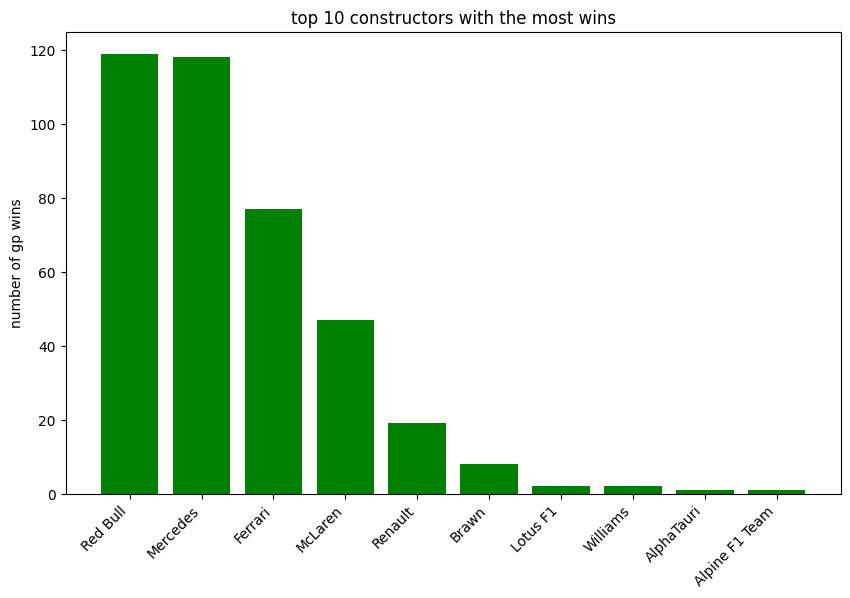

In [20]:
# Visualizing constructors with the most wins
top_ten_constructors_winners = constructors_winners.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_ten_constructors_winners["constructors_name"],top_ten_constructors_winners["wins"],color = "green")
plt.xticks(rotation=45,ha="right")
plt.ylabel("number of gp wins")
plt.title("top 10 constructors with the most wins")

From the above visualization
 - ferrari has the most wins with approximately 246 wins
 - MCLaren is the second in place with with approximately 180 wins
 - Mercedes comes in the third place with 127 wins
 - red bull comes in the forth place with 120 wins 
 - williams and Team Lotus are the next with 30 - 50 wins
 - Benetton,Brabham,Tyrrel are in the buttom with 20 - 27 wins

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grid                      4121 non-null   int64  
 1   positionOrder             4121 non-null   int64  
 2   points                    4121 non-null   float64
 3   laps                      4121 non-null   int64  
 4   time                      4121 non-null   object 
 5   milliseconds              4121 non-null   float64
 6   fastestLap                4121 non-null   object 
 7   fastestLapRank            4121 non-null   float64
 8   fastestLapTime            4121 non-null   object 
 9   fastestLapSpeed           4121 non-null   float64
 10  year                      4121 non-null   int64  
 11  gp_name                   4121 non-null   object 
 12  round                     4121 non-null   int64  
 13  driver                    4121 non-null   object 
 14  drivers_

 # **Bivariate analyis**
 Bivariate analysis is a statistical method of two to variables to understand the relationship between the two variables 

In [22]:
# checking for the corr between different various numeric columns
corr_matrix = abs(df.corr(numeric_only=True))
corr_matrix

,grid,positionOrder,points,laps,milliseconds,fastestLapRank,fastestLapSpeed,year,round
grid,1.000000,0.669152,0.596262,0.095706,0.091377,0.516157,0.036177,0.035810,0.034205
positionOrder,0.669152,1.000000,0.825528,0.121220,0.081363,0.654678,0.031641,0.113689,0.033863
points,0.596262,0.825528,1.000000,0.069892,0.010395,0.569063,0.009504,0.196484,0.005076
laps,0.095706,0.121220,0.069892,1.000000,0.144447,0.091732,0.450862,0.053442,0.040843
milliseconds,0.091377,0.081363,0.010395,0.144447,1.000000,0.070795,0.483307,0.093636,0.044704
fastestLapRank,0.516157,0.654678,0.569063,0.091732,0.070795,1.000000,0.088942,0.095568,0.024445
fastestLapSpeed,0.036177,0.031641,0.009504,0.450862,0.483307,0.088942,1.000000,0.100585,0.031606
year,0.035810,0.113689,0.196484,0.053442,0.093636,0.095568,0.100585,1.000000,0.044434
round,0.034205,0.033863,0.005076,0.040843,0.044704,0.024445,0.031606,0.044434,1.000000


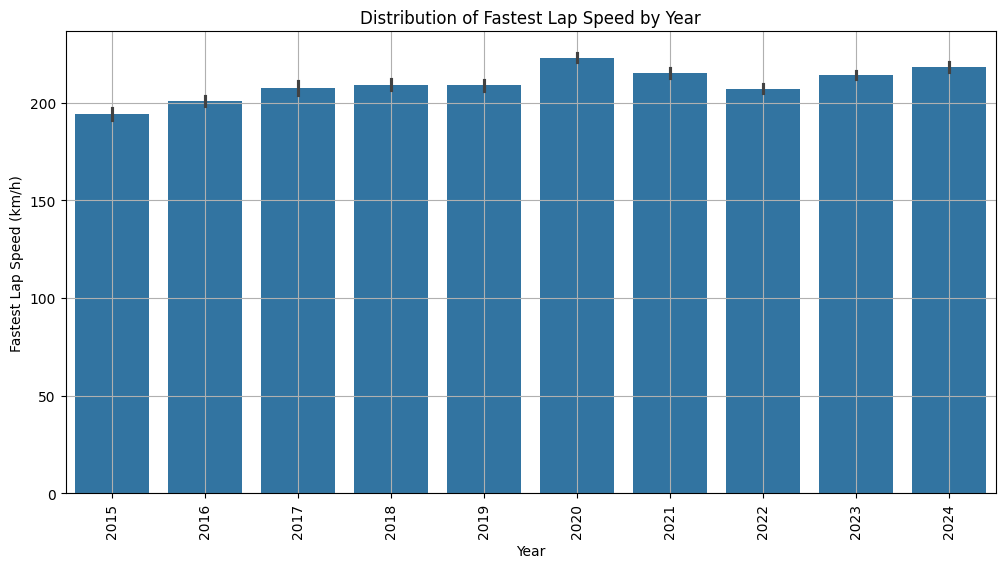

In [23]:
plt.figure(figsize=(12, 6))
last_ten_years = df[df["year"]>2014]
sns.barplot(x='year', y='fastestLapSpeed', data=last_ten_years)
plt.title('Distribution of Fastest Lap Speed by Year')
plt.xlabel('Year')
plt.ylabel('Fastest Lap Speed (km/h)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


## What is the impact of grid position to the winning position 

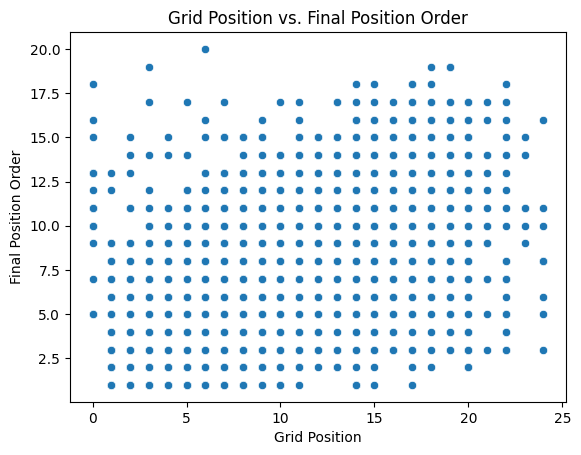

In [24]:

# plotting a  Scatter plot
sns.scatterplot(x='grid', y='positionOrder', data=df)
plt.title('Grid Position vs. Final Position Order')
plt.xlabel('Grid Position')
plt.ylabel('Final Position Order')
plt.show()




The scatter plot illustrates that while starting grid position has an influence on the final finishing order, it is not the sole determinant. There is considerable variability, meaning that a driver starting in a poor grid position can still achieve a strong finish, and vice versa. This plot underscores the unpredictable and competitive nature of racing, where multiple factors influence the final outcome.

## Multivariate Analysis
Multivariate analysis involves examining more than two variables simultaneously to understand the relationships between them.

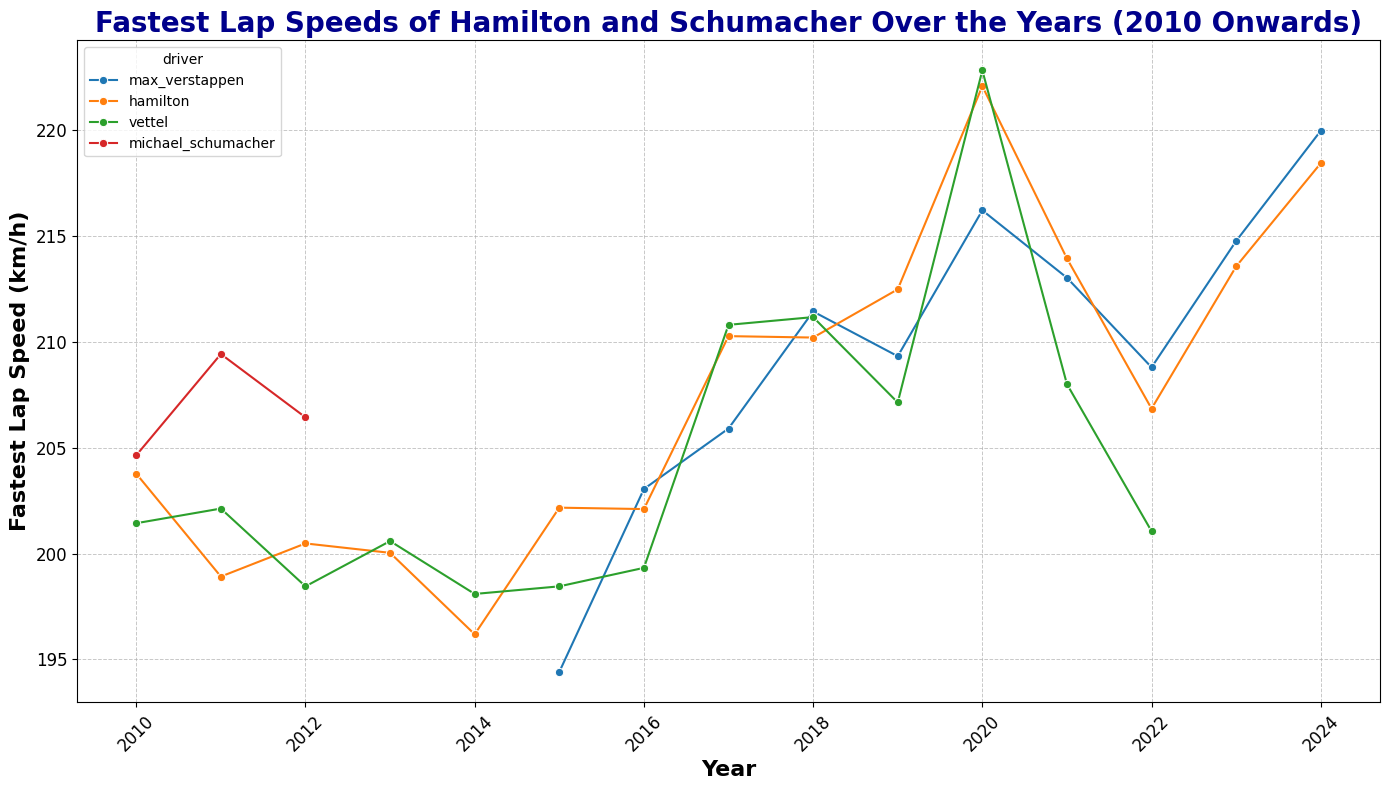

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data from 2010 onwards
df_2010_onwards = df[df['year'] >= 2010]

# Filter the dataframe to include only Lewis Hamilton's and Michael Schumacher's data
df_filtered = df_2010_onwards[df_2010_onwards['driver'].isin(['hamilton', 'michael_schumacher','max_verstappen','vettel'])]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='fastestLapSpeed', hue='driver', data=df_filtered, marker='o',errorbar=None)

# Add titles and labels with enhanced formatting
plt.title('Fastest Lap Speeds of Hamilton and Schumacher Over the Years (2010 Onwards)', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Fastest Lap Speed (km/h)', fontsize=16, fontweight='bold')

# Enhance the axis ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


The above graph shows fastest lap time 
- Hamilton has shown remarkable consistency and growth, particularly from 2015 onwards, reflecting his dominance in Formula 1 during this period.
- Schumacher's graph reflects the winding down of his career, with stable but non-competitive speeds after 2012.
- Vettel peaked around 2019 but has seen a decline in the following years, suggesting challenges in maintaining peak performance.
- Verstappen showed strong performance early on but has experienced a significant drop after 2019, which could be due to various factors including car performance, team strategies, or external conditions.

# Modelling

# Logistic Regression

# data preparation

We are going to use classification modelling so we are going to convert our target variable to categories

In [26]:

def categorize_position(position):
    if position <= 3:
        return 'Top 3'
    elif position <= 10:
        return 'Top 10'
    else:
        return 'Outside Top 10'

df['position_category'] = df['positionOrder'].apply(categorize_position)

df.head()

,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,drivers_nationality,constructors_name,constructors_nationality,position_category
0,1,1,26.0,57,1:31:44.742,5504742.0,39,1.0,1:32.608,210.383,2024,Bahrain Grand Prix,1,max_verstappen,Dutch,Red Bull,Austrian,Top 3
1,5,2,18.0,57,+22.457,5527199.0,40,4.0,1:34.364,206.468,2024,Bahrain Grand Prix,1,perez,Mexican,Red Bull,Austrian,Top 3
2,4,3,15.0,57,+25.110,5529852.0,44,6.0,1:34.507,206.156,2024,Bahrain Grand Prix,1,sainz,Spanish,Ferrari,Italian,Top 3
3,2,4,12.0,57,+39.669,5544411.0,36,2.0,1:34.090,207.069,2024,Bahrain Grand Prix,1,leclerc,Monegasque,Ferrari,Italian,Top 10
4,3,5,10.0,57,+46.788,5551530.0,40,12.0,1:35.065,204.946,2024,Bahrain Grand Prix,1,russell,British,Mercedes,German,Top 10


 next step is to split our dataset into x and y

In [27]:
# splitting the dataset into x(features) and y(target)
X = df.drop(columns=["position_category","positionOrder"])
y = df["position_category"]
y

0        Top 3
1        Top 3
2        Top 3
3       Top 10
4       Top 10
         ...  
4116    Top 10
4117    Top 10
4118    Top 10
4119    Top 10
4120    Top 10
Name: position_category, Length: 4121, dtype: object

Encoding the categorical features for modelling

In [28]:
# Encoding categorical features
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_features = ["gp_name","driver","drivers_nationality","constructors_name","constructors_nationality"]
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with the original DataFrame
X = X.drop(columns=categorical_features).join(encoded_df)



In [29]:
# encoding the target_variable
y = pd.get_dummies(y,prefix="position").astype(int)

In [30]:
y

,position_Outside Top 10,position_Top 10,position_Top 3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4116,0,1,0
4117,0,1,0
4118,0,1,0
4119,0,1,0


## splitting the dataset into Training set and Test set 

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x_train


,grid,points,laps,time,milliseconds,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,year,...,constructors_nationality_French,constructors_nationality_German,constructors_nationality_Indian,constructors_nationality_Irish,constructors_nationality_Italian,constructors_nationality_Japanese,constructors_nationality_Malaysian,constructors_nationality_Russian,constructors_nationality_Spanish,constructors_nationality_Swiss
3261,11,0.0,57,+48.822,5800111.0,53,13.0,1:39.704,195.663,2009,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,10,4.0,78,+55.200,6263637.0,43,3.0,1:15.607,158.890,2019,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
399,3,10.0,71,+40.845,7049739.0,67,4.0,1:14.007,209.607,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1411,15,4.0,67,+31.750,5581595.0,64,17.0,1:17.941,211.267,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2481,22,4.0,58,+39.458,5689023.0,46,12.0,1:30.843,210.151,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,16,2.0,60,+39.081,5788722.0,54,14.0,1:31.562,202.407,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,13,0.0,57,+1:26.519,5837808.0,55,1.0,1:38.683,197.687,2009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1653,6,10.0,55,+46.269,5700331.0,43,5.0,1:42.028,195.969,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,11,0.0,67,+76.829,5542691.0,44,18.0,1:20.066,205.660,2012,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Feature scalling

In [32]:
from sklearn.preprocessing import StandardScaler
numeric_columns = x_train.select_dtypes(include=['number']).columns
x_train_numeric = x_train[numeric_columns]
x_test_numeric = x_test[numeric_columns]
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_numeric)
x_test_scaled = sc.transform(x_test_numeric)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=numeric_columns, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=numeric_columns, index=x_test.index)


## Training the model

In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [34]:
linear_model.fit(x_train_scaled,y_train)

LinearRegression()

## predicting a new result

In [35]:
y_pred = linear_model.predict(x_test_scaled)
y_pred

array([[ 0.32531533,  0.79908785, -0.13734263],
       [ 0.25304971,  0.70289644,  0.02598745],
       [ 0.34777627,  0.72139009, -0.08827036],
       ...,
       [ 0.49816689,  0.72096285, -0.21424693],
       [ 0.22472939,  0.5529941 ,  0.23692495],
       [ 0.41808877,  0.72291597, -0.20545786]])

In [36]:
y_test

,position_Outside Top 10,position_Top 10,position_Top 3
3237,1,0,0
45,0,1,0
2776,1,0,0
2954,0,1,0
3681,1,0,0
...,...,...,...
1944,0,1,0
3420,0,1,0
1351,1,0,0
1422,0,1,0


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
import numpy as np
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_single, y_pred_single)



In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test_single, y_pred_single)
print(report)


              precision    recall  f1-score   support

           0       0.60      0.30      0.40       134
           1       0.73      0.84      0.78       449
           2       0.81      0.81      0.81       242

    accuracy                           0.75       825
   macro avg       0.71      0.65      0.66       825
weighted avg       0.73      0.75      0.73       825



In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_train and y_test from one-hot encoded back to single labels
y_train_single = np.argmax(y_train.values, axis=1)
y_test_single = np.argmax(y_test.values, axis=1)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model on the training data
logreg.fit(x_train_scaled_df, y_train_single)

# Predict on the test data
y_pred = logreg.predict(x_test_scaled_df)


In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test_single, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8497


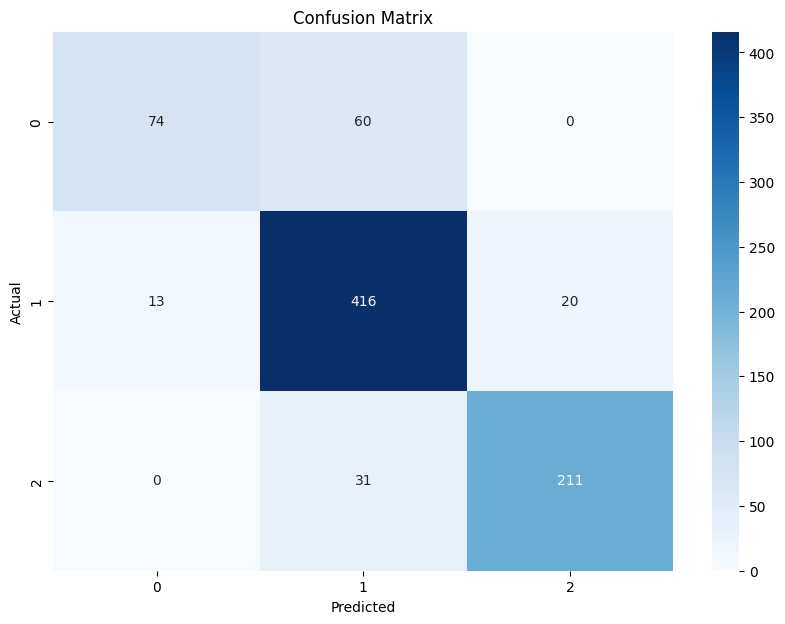

Confusion Matrix:
[[ 74  60   0]
 [ 13 416  20]
 [  0  31 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67       134
           1       0.82      0.93      0.87       449
           2       0.91      0.87      0.89       242

    accuracy                           0.85       825
   macro avg       0.86      0.78      0.81       825
weighted avg       0.85      0.85      0.84       825



In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test_single, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_single), yticklabels=np.unique(y_test_single))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
cr = classification_report(y_test_single, y_pred)
print(cr)


Accuracy: 85%
Class 0: Precision 85%, Recall 55%, F1-Score 67%
Class 1: Precision 82%, Recall 93%, F1-Score 87%
Class 2: Precision 91%, Recall 87%, F1-Score 89%
Key Insight: The model performs best on Class 2, with high precision and recall. Class 0 shows lower recall, indicating room for improvement.



In [43]:
# Classification Report
report = classification_report(y_test_single, y_pred, target_names=[str(i) for i in np.unique(y_test_single)])
print(report)


              precision    recall  f1-score   support

           0       0.85      0.55      0.67       134
           1       0.82      0.93      0.87       449
           2       0.91      0.87      0.89       242

    accuracy                           0.85       825
   macro avg       0.86      0.78      0.81       825
weighted avg       0.85      0.85      0.84       825



Accuracy: 85%
- Class 0: Precision 85%, Recall 55%, F1-Score 67%
- Class 1: Precision 82%, Recall 93%, F1-Score 87%
- Class 2: Precision 91%, Recall 87%, F1-Score 89%
- Key Insight: The model performs best on Class 2, with high precision and recall. Class 0 shows lower recall, indicating room for improvement.



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


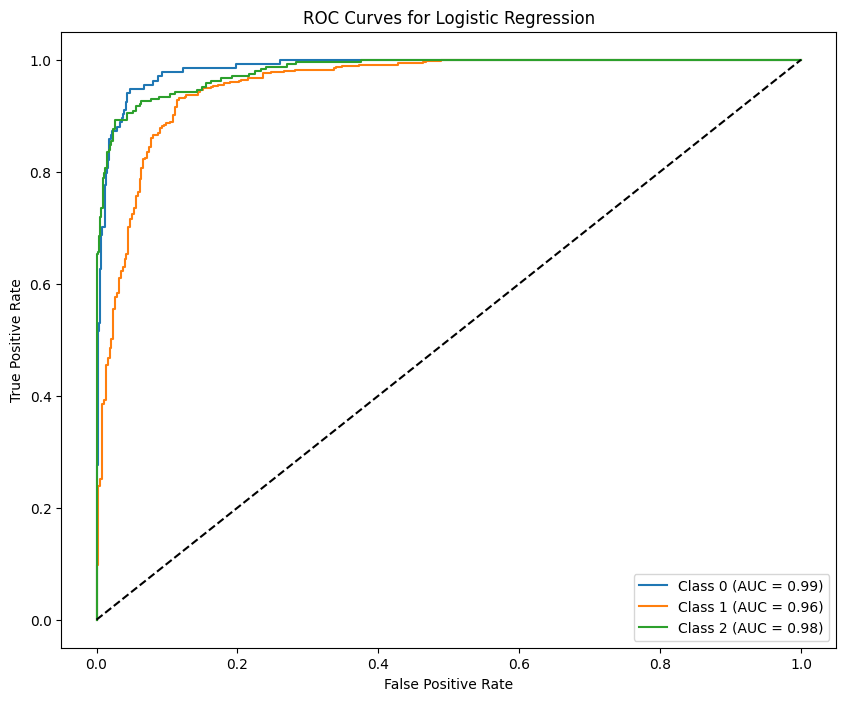

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Step 2: Fit the model (Assuming you've already split and scaled your data)
logistic_model.fit(x_train_scaled_df, y_train_single)

# Step 3: Predict probabilities for the test set
y_test_proba = logistic_model.predict_proba(x_test_scaled_df)


fpr = {}
tpr = {}
roc_auc = {}

from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(logistic_model.classes_)):
    # Calculate ROC curve for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_single == i, y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC Curves
plt.figure(figsize=(10, 8))
for i in range(len(logistic_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression")
plt.legend(loc="lower right")
plt.show()


The ROC curves suggest that the logistic regression model is effective in distinguishing between the different classes, with particularly strong performance for Classes 0 and 2. The model may be slightly less effective for Class 1, but it still performs well. These curves can help in selecting the optimal threshold for classification or in comparing different models' performance on the same dataset.

# Decision Tree Regression

In [45]:
# importing necessary libraries
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Training the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(x_train_scaled,y_train)

y_pred_dt = decision_tree.predict(x_test_scaled)
y_pred_single = np.argmax(y_pred_dt,axis=1)

In [47]:
# confusion_matrix
cm_dt = confusion_matrix(y_test_single,y_pred_single)
cm_dt

array([[124,  10,   0],
       [  7, 441,   1],
       [  0,   0, 242]])

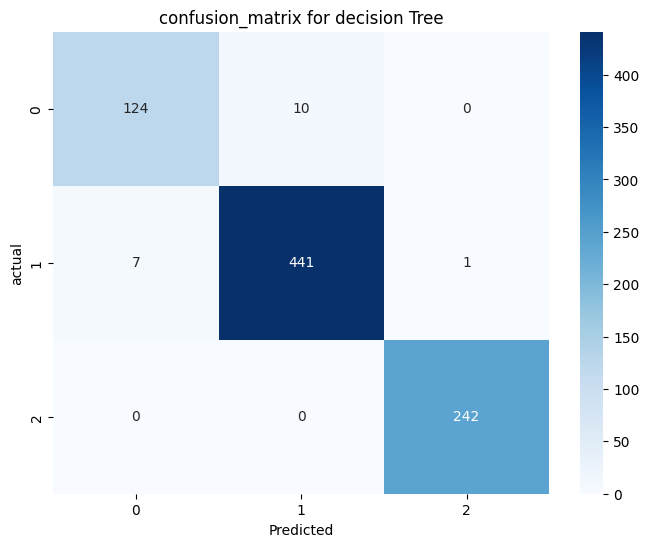

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       134
           1       0.98      0.98      0.98       449
           2       1.00      1.00      1.00       242

    accuracy                           0.98       825
   macro avg       0.97      0.97      0.97       825
weighted avg       0.98      0.98      0.98       825



In [48]:
# plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt,annot=True,fmt="d",cmap="Blues")
plt.title("confusion_matrix for decision Tree")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

print(classification_report(y_test_single,y_pred_single))

 Accuracy: 98%
- Class 0: Precision 95%, Recall 93%, F1-Score 94%
- Class 1: Precision 98%, Recall 98%, F1-Score 98%
- Class 2: Precision, Recall, F1-Score all at 100%
Key Points:
- High accuracy across all classes.
- Perfect performance for Class 2.
- Strong results for Class 0 and 1.


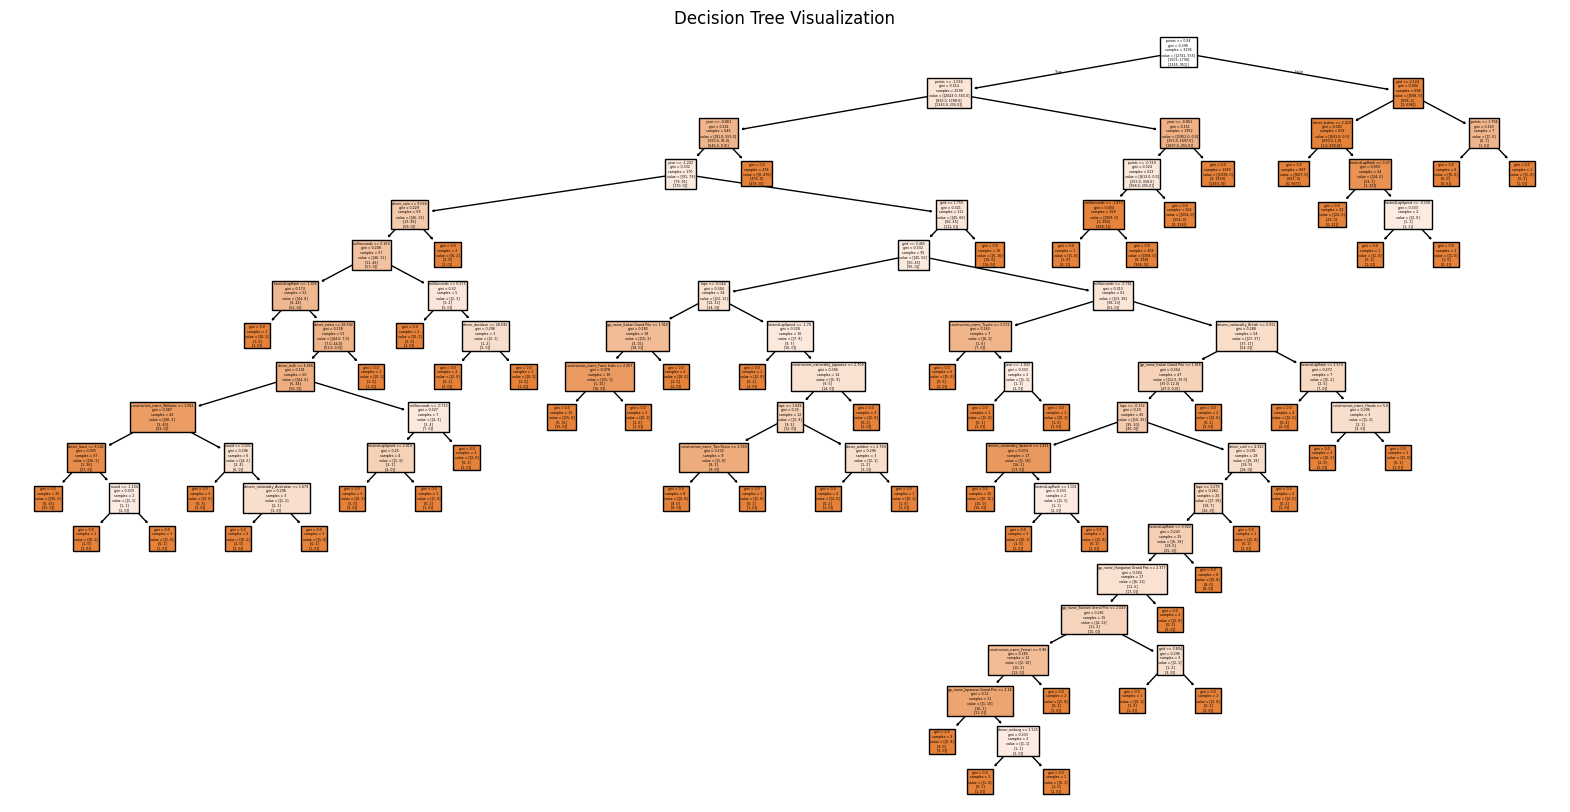

In [49]:
# plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=numeric_columns, class_names=encoder.categories_[0], filled=True)
plt.title('Decision Tree Visualization')
plt.show()



## Conclusion
Decision tree classification model demonstrates a notable enhancement in performance compared to the initial model. Key findings include:
- **Improved Accuracy**: Decision tree model achieved a high accuracy of 98%, reflecting its effectiveness in making reliable predictions.
- **Enhanced Metrics**: Precision, recall, and F1-score improved significantly across all classes, especially for Class 2, indicating strong model performance.

**Recommendations:**
1. **Use Decision Tree  Model**: Given its superior performance, the optimized model should be used for predictions.
2. **Validate and Test Further**: Perform additional validation on new datasets to ensure robustness.
3. **Class 2 (Top Finishers)**: The model perfectly predicts the top finishers, suggesting a strong understanding of the factors leading to success. Continue to focus on the key variables influencing top performance.


